# NYSE FANG+ Index 週足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'NYFANG'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-13 00:00:00-04:00,5338.620117,5866.629883,5338.620117,5764.379883,0,0.0,0.0
2023-03-20 00:00:00-04:00,5761.830078,6033.500000,5652.359863,5939.950195,0,0.0,0.0
2023-03-27 00:00:00-04:00,5939.950195,6192.529785,5767.560059,6190.009766,0,0.0,0.0
2023-04-03 00:00:00-04:00,6190.009766,6198.339844,5911.299805,6060.560059,0,0.0,0.0
2023-04-10 00:00:00-04:00,6060.560059,6075.810059,5902.200195,6044.839844,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,13606.740234,14053.740234,13596.299805,14029.120117,0,0.0,0.0
2025-02-17 00:00:00-05:00,14029.120117,14047.469727,13336.669922,13366.769531,0,0.0,0.0
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,12496.990234,12871.910156,0,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00-04:00,2846.209961,2846.219971,2455.649902,2656.110107,0,0.0,0.0
2020-03-23 00:00:00-04:00,2667.580078,3008.929932,2593.800049,2901.250000,0,0.0,0.0
2020-03-30 00:00:00-04:00,2924.370117,3066.959961,2792.659912,2829.550049,0,0.0,0.0
2020-04-06 00:00:00-04:00,2925.120117,3147.510010,2917.790039,3107.439941,0,0.0,0.0
2020-04-13 00:00:00-04:00,3112.439941,3500.020020,3098.870117,3452.090088,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,13606.740234,14053.740234,13596.299805,14029.120117,0,0.0,0.0
2025-02-17 00:00:00-05:00,14029.120117,14047.469727,13336.669922,13366.769531,0,0.0,0.0
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,12496.990234,12871.910156,0,0.0,0.0


In [3]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-16 00:00:00-04:00,2846.209961,2846.219971,2455.649902,2656.110107,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,2667.580078,3008.929932,2593.800049,2901.250000,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00-04:00,2924.370117,3066.959961,2792.659912,2829.550049,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00-04:00,2925.120117,3147.510010,2917.790039,3107.439941,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-13 00:00:00-04:00,3112.439941,3500.020020,3098.870117,3452.090088,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,13606.740234,14053.740234,13596.299805,14029.120117,0,0.0,0.0,12267.609863,11471.775146,13302.194824,8726.145630,16047.824341
2025-02-17 00:00:00-05:00,14029.120117,14047.469727,13336.669922,13366.769531,0,0.0,0.0,12404.689941,11598.737305,13340.024658,8986.806274,15951.955688
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,12496.990234,12871.910156,0,0.0,0.0,12413.614746,11755.947754,13362.299561,9346.420044,15771.827271


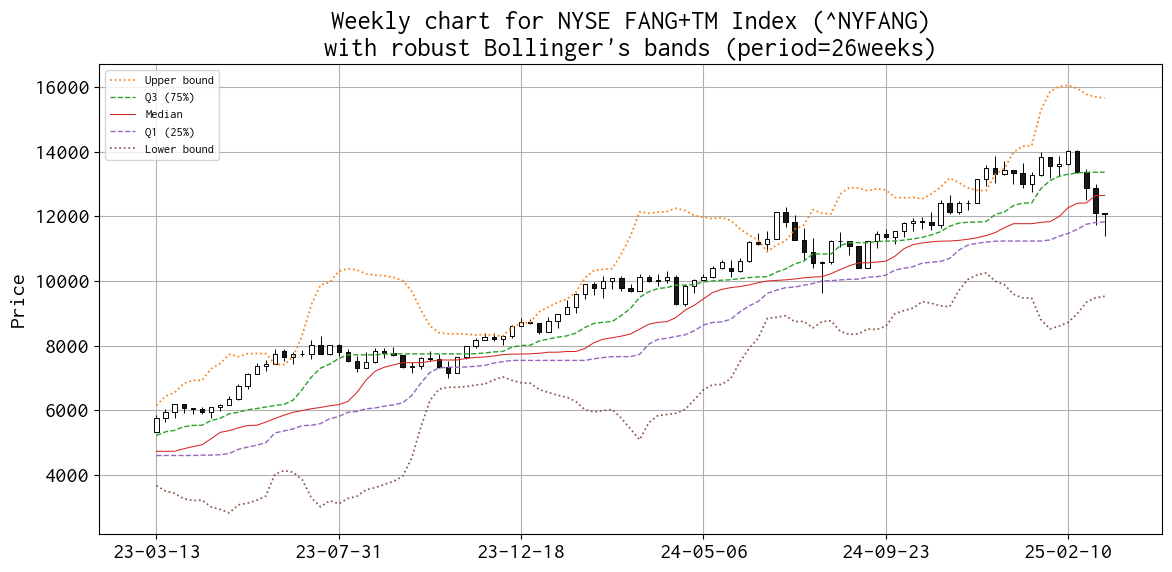

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=False,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00-05:00,14029.120117,14047.469727,13336.669922,13366.769531,0,0.0,0.0
2025-02-24 00:00:00-05:00,13366.769531,13456.679688,12496.989258,12677.612305,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00-05:00    13366.769531
2025-02-24 00:00:00-05:00    12649.284180
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00-05:00           NaN
2025-02-24 00:00:00-05:00   -717.485352
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00-05:00   -717.485352
dtype: float64

In [9]:
df['Close'].rolling(13).mean().tail()

Date
2025-01-27 00:00:00-05:00    13056.271409
2025-02-03 00:00:00-05:00    13147.862230
2025-02-10 00:00:00-05:00    13293.409180
2025-02-17 00:00:00-05:00    13366.916842
2025-02-24 00:00:00-05:00    13386.230243
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(26).mean().tail()

Date
2025-01-27 00:00:00-05:00    12196.721492
2025-02-03 00:00:00-05:00    12312.319561
2025-02-10 00:00:00-05:00    12419.750714
2025-02-17 00:00:00-05:00    12501.673002
2025-02-24 00:00:00-05:00    12561.467398
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00-05:00    11312.169002
2025-02-03 00:00:00-05:00    11383.494779
2025-02-10 00:00:00-05:00    11464.989014
2025-02-17 00:00:00-05:00    11529.661508
2025-02-24 00:00:00-05:00    11579.015437
Name: Close, dtype: float64

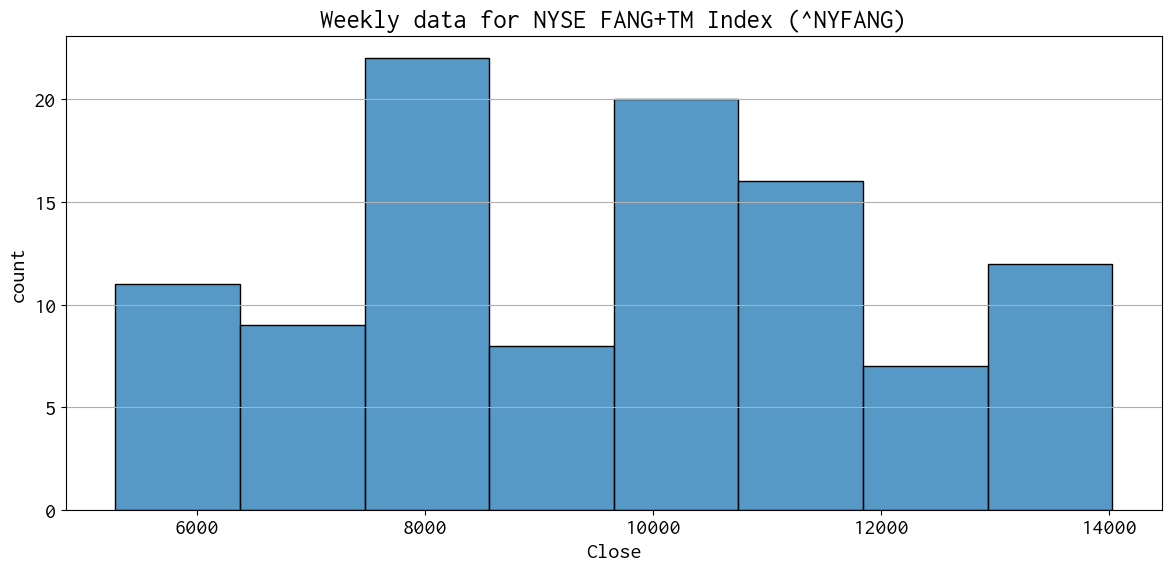

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

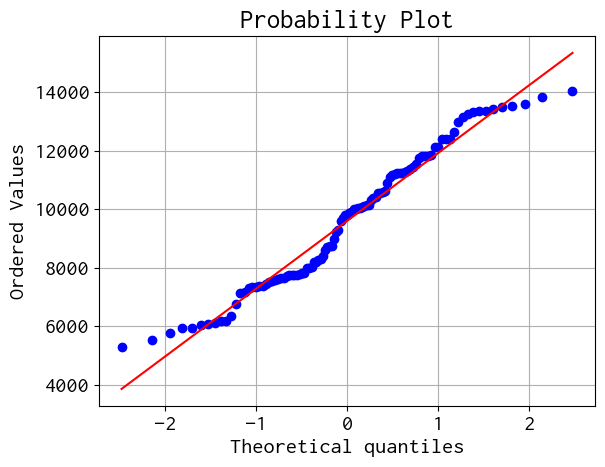

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9624556204068881, p-value: 0.00456471323008903
